In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

# Read the Excel file
df = pd.read_excel('/content/drive/MyDrive/Copy of data.xlsx')

# Quick peek
df.head()


,name,online_order,book_table,Rating,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [3]:
df.info()
df.describe(include='all')  # gives summary for all columns
df.isnull().sum()           # count missing values in each column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41263 entries, 0 to 41262
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         41263 non-null  object 
 1   online_order                 41263 non-null  object 
 2   book_table                   41263 non-null  object 
 3   Rating                       41263 non-null  float64
 4   votes                        41263 non-null  int64  
 5   location                     41263 non-null  object 
 6   rest_type                    41263 non-null  object 
 7   cuisines                     41263 non-null  object 
 8   approx_cost(for two people)  41263 non-null  int64  
 9   listed_in(type)              41263 non-null  object 
 10  listed_in(city)              41263 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 3.5+ MB


,0
name,0
online_order,0
book_table,0
Rating,0
votes,0
location,0
rest_type,0
cuisines,0
approx_cost(for two people),0
listed_in(type),0


In [4]:
# Count duplicates
df.duplicated().sum()


np.int64(73)

In [5]:
df.drop_duplicates(inplace=True)


In [6]:
df.shape


(41190, 11)

In [7]:
df['location'] = df['location'].str.strip().str.title()
print(df['location'].nunique())
print(df['location'].value_counts())
df['cuisines'] = df['cuisines'].str.strip().str.title()
df['cuisines'].value_counts().head(10)
df['rest_type'] = df['rest_type'].str.strip().str.title()
df['listed_in(type)'] = df['listed_in(type)'].str.strip().str.title()
df['listed_in(city)'] = df['listed_in(city)'].str.strip().str.title()

92
location
Btm                      3873
Koramangala 5Th Block    2295
Hsr                      1992
Indiranagar              1795
Jp Nagar                 1710
                         ... 
Yelahanka                   4
West Bangalore              3
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: count, Length: 92, dtype: int64


In [8]:
print(df['Rating'].unique())



[4.1 3.8 3.7 3.6 4.6 4.  4.2 3.9 3.1 3.  3.2 3.3 2.8 4.4 4.3 2.9 3.5 2.6
 3.4 4.5 2.5 2.7 4.7 2.4 2.2 2.3 4.8 4.9 2.1 2.  1.8]


In [9]:
# 1. Make a copy to avoid modifying original DataFrame
df_exploded = df.copy()

# 2. Split the 'cuisines' column by commas and remove whitespace
df_exploded['cuisines'] = df_exploded['cuisines'].str.split(',').apply(lambda x: [i.strip() for i in x])

# 3. Explode the cuisines so each row has only one cuisine
df_exploded = df_exploded.explode('cuisines')

# 4. Group by individual cuisines and calculate average rating and total votes
cuisine_stats = df_exploded.groupby('cuisines').agg({
    'Rating': 'mean',
    'votes': 'sum'
}).reset_index()

# 5. Sort by rating (top cuisines by quality)
top_cuisines_by_rating = cuisine_stats.sort_values(by='Rating', ascending=False).head(10)
print("🔝 Top Cuisines by Average Rating:")
print(top_cuisines_by_rating)

# 6. Sort by votes (top cuisines by popularity)
top_cuisines_by_votes = cuisine_stats.sort_values(by='votes', ascending=False).head(10)
print("\n Top Cuisines by Total Votes (Popularity):")
print(top_cuisines_by_votes)



🔝 Top Cuisines by Average Rating:
          cuisines    Rating   votes
24       Cantonese  4.600000   14122
2          African  4.523529   11083
88     Singaporean  4.414894   56700
13         Belgian  4.366667    2030
59       Malaysian  4.315094  137925
65   Modern Indian  4.307692  149211
92      Sri Lankan  4.306667   45318
102          Vegan  4.300000    1148
49          Jewish  4.300000    1148
36          German  4.285714   14238

 Top Cuisines by Total Votes (Popularity):
        cuisines    Rating    votes
72  North Indian  3.641717  6758373
29   Continental  3.962046  4319653
27       Chinese  3.611805  4035291
23          Cafe  3.900711  2830758
47       Italian  3.955542  2590169
3       American  4.070323  2038705
21        Burger  3.915046  1459703
77         Pizza  3.906431  1381679
90  South Indian  3.606755  1311055
30      Desserts  3.862253  1251123


In [10]:
# Step 1: Sort by Rating (descending)
best_sorted = df.sort_values(by='Rating', ascending=False)

# Step 2: Drop duplicates by restaurant name to keep only one entry per restaurant
best_unique_restaurants = best_sorted.drop_duplicates(subset='name', keep='first')

# Step 3: Filter to only best-rated restaurants (you can change threshold if needed)
highlight = best_unique_restaurants[best_unique_restaurants['Rating'] >= 4.5]

# Step 4: Keep only name, rating, and cuisines
highlight = highlight[['name', 'cuisines','Rating']]

# Step 5: Show top 10
print(" Best-Rated Restaurants and Their Cuisines:")
print(highlight.head(10))



 Best-Rated Restaurants and Their Cuisines:
                                                    name  \
6318                                            Flechazo   
15341                          AB's - Absolute Barbecues   
29110                     Asia Kitchen By Mainland China   
31482                                       Punjab Grill   
3172                         Byg Brewski Brewing Company   
30050                             Belgian Waffle Factory   
14583                                   Milano Ice Cream   
36557  SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...   
29008                                         Biergarten   
37116                                                CTR   

                                                cuisines  Rating  
6318             Asian, Mediterranean, North Indian, Bbq     4.9  
15341         European, Mediterranean, North Indian, Bbq     4.9  
29110                        Asian, Chinese, Thai, Momos     4.9  
31482                      

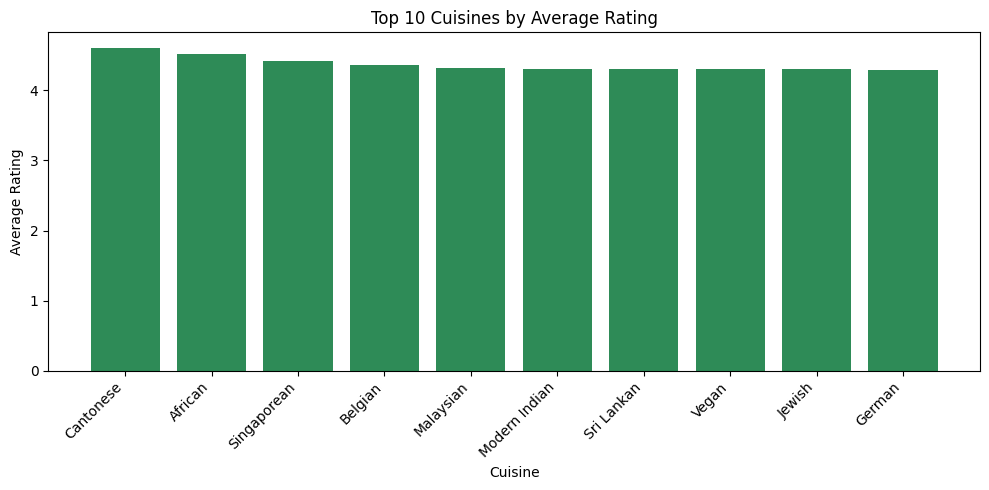

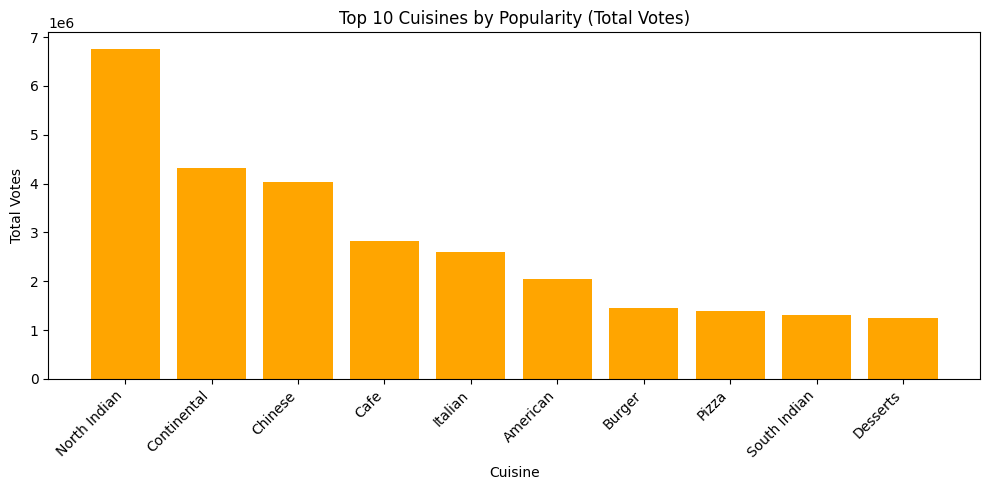

In [11]:
import matplotlib.pyplot as plt

# Bar Chart: Top Cuisines by Rating
plt.figure(figsize=(10, 5))
plt.bar(top_cuisines_by_rating['cuisines'], top_cuisines_by_rating['Rating'], color='seagreen')
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Bar Chart: Top Cuisines by Total Votes
plt.figure(figsize=(10, 5))
plt.bar(top_cuisines_by_votes['cuisines'], top_cuisines_by_votes['votes'], color='orange')
plt.title('Top 10 Cuisines by Popularity (Total Votes)')
plt.xlabel('Cuisine')
plt.ylabel('Total Votes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
